# Placing borrowing events

In [1]:
# code
import sys; sys.path.insert(0,'..')
from geotaste.imports import *

## Method

The below is the logic:

In [39]:
prune_when_dwelling_matches??

Signature: prune_when_dwelling_matches(df)
Docstring: <no docstring>
Source:   
def prune_when_dwelling_matches(df):
    df_nonevent, df_event=df[df.event==''],df[df.event!='']
    
    # anyone's ok if they're not an event
    numpossd = {ii:np.nan for ii in df.index}
    matchtyped={
        **{ii:'NA' for ii in df_nonevent.index},
        **{ii:'?' for ii in df_event.index}
    }
    matchfoundd={ii:None for ii in df.index}
    excludedd={ii:False for ii in df.index}


    def declare_impossible(xdf):
        # but declare them impossible to match to a dwelling
        for ii in xdf.index:
            matchtyped[ii]='Impossible'
            numpossd[ii]=0
            matchfoundd[ii]=False
            excludedd[ii]=True

    def declare_exact_match(xdf):
        for ii in xdf.index:
            matchtyped[ii]='Exact'
            matchfoundd[ii]=True
            numpossd[ii]=len(xdf)

    def declare_exact_miss(xdf):
        logger.debug(f'for event {e}, a certain match was found, wit

In [40]:
# get data
# df = Combined().gen(save=True)
df = Combined().data

In [41]:
# cols we want to show
cols=TCOLS + [c for c in df if c.startswith('dwelling') and c not in set(TCOLS) and c!='dwelling_excluded']

## Results

### How many events can be precisely assigned to locations/dwellings?

These were limited to borrow events. 

Key for list below:
* `Ambiguous` = Event was assigned multiple dwelling possibilities:
    * `Ambiguous (Colens)` = because none of that member's dwellings have start/end dates. Issue named after [Fernand Colens](https://shakespeareandco.princeton.edu/members/colens-fernand/).
    * `Ambiguous (Raphael)` = because, although some/all of that member's dwellings have start/end dates, this particular event lies before, between, or after known dwelling dates
* `Singular` = Event was assigned one dwelling possibility because just one existed (after filtering for >50km from Paris, etc -- see logic above)
* `Exact` = An exact match was found for event (its start or end date happened during a dwelling possibility with known start and end dates)
* `Exact (excl.)` = A dwelling possility excluded because an exact match was possible but not found
* `NA` = not an event (i.e. rows in dataframe with no event, like members with no borrowing records).


In [45]:
df.groupby('dwelling_matchtype').event.nunique().sort_values(ascending=False)

dwelling_matchtype
Singular               10708
Ambiguous (Colens)      6297
Exact                   2910
Ambiguous (Raphael)      925
NA                         1
Name: event, dtype: int64

### Example events from types

In [58]:
df[df.dwelling_matchtype=='Ambiguous (Colens)'][cols].sample(n=10)

,event,dwelling,event_start,event_end,dwelling_start,dwelling_end,dwelling_address,dwelling_city,dwelling_matchfound,dwelling_matchtype,dwelling_numposs,dwelling_likelihood
42319,E18104,plummer-dorothy;48.83878;2.35711;;,1936-01-29,1936-01-30,,,42 boulevard Saint-Marcel,Paris,True,Ambiguous (Colens),7.0,0.142857
36758,E15447,massey;48.84094;2.33439;;,1934-05-14,1934-06-25,,,115 rue Notre Dame des Champs,Paris,True,Ambiguous (Colens),7.0,0.142857
18762,E11366,imbs-bravig;48.8468;2.33134;;,1930-05-22,1930-05-31,,,64 rue Madame,Paris,True,Ambiguous (Colens),3.0,0.333333
50927,E25728,rirachowsky-fanny;48.86286;2.28648;;,1939-07-20,1939-07-26,,,24 place du Trocadéro et du 11 Novembre,Paris,True,Ambiguous (Colens),2.0,0.500000
12076,E29849,vigan-monique-de;48.84112;2.29701;;,1947-09-07,,,,23 rue Théophraste Renaudot,Paris,True,Ambiguous (Colens),3.0,0.333333
10973,E25510,vigan-monique-de;48.84005;2.29648;;,1939-06-26,1939-07-08,,,57 rue de l'Abbé Groult,Paris,True,Ambiguous (Colens),3.0,0.333333
42364,E14244,plummer-dorothy;48.83878;2.35711;;,1933-08-28,1933-09-05,,,42 boulevard Saint-Marcel,Paris,True,Ambiguous (Colens),7.0,0.142857
13385,E27862,wendel;48.85561;2.32929;;,1941-01-06,1941-01-23,,,14 rue Saint-Guillaume,Paris,True,Ambiguous (Colens),5.0,0.200000
10898,E28474,vigan-monique-de;48.84005;2.29648;;,1941-05-20,1941-05-29,,,57 rue de l'Abbé Groult,Paris,True,Ambiguous (Colens),3.0,0.333333
13386,E28150,wendel;48.85561;2.32929;;,1941-03-19,1941-04-09,,,14 rue Saint-Guillaume,Paris,True,Ambiguous (Colens),5.0,0.200000


In [59]:
df[df.dwelling_matchtype=='Ambiguous (Raphael)'][cols].sample(n=10)

,event,dwelling,event_start,event_end,dwelling_start,dwelling_end,dwelling_address,dwelling_city,dwelling_matchfound,dwelling_matchtype,dwelling_numposs,dwelling_likelihood
35486,E15102,maspero-henri;48.86254;2.28107;1933-01-01;1934...,1934-02-27,1934-03-13,1933-01-01,1934-01-01,45 rue Scheffer,Paris,True,Ambiguous (Raphael),4.0,0.250000
55886,E05360,stein-leo;48.84167;2.33017;1923-08-01;1924-01-01,1925-06-17,1925-06-18,1923-08-01,1924-01-01,203 boulevard Raspail,Paris,True,Ambiguous (Raphael),3.0,0.333333
43256,E05369,pottecher-therese;48.84438;2.34666;1924-03-01;,1925-06-19,1925-07-07,1924-03-01,,13 rue de l'Estrapade,Paris,True,Ambiguous (Raphael),2.0,0.500000
14879,E22342,ford-ford-madox;48.86715;2.32195;1939-01-01;,1938-03-02,1938-03-23,1939-01-01,,4 place de la Concorde,Paris,True,Ambiguous (Raphael),2.0,0.500000
8180,E14353,connolly-cyril;48.8536;2.33687;1929-01-01;1929...,1933-10-12,1933-10-25,1929-01-01,1929-01-01,60 rue de Seine,Paris,True,Ambiguous (Raphael),3.0,0.333333
55887,E05370,stein-leo;48.84167;2.33017;1923-08-01;1924-01-01,1925-06-20,1925-06-23,1923-08-01,1924-01-01,203 boulevard Raspail,Paris,True,Ambiguous (Raphael),3.0,0.333333
40974,E13552,oppen;48.85458;2.34209;1933-01-01;1933-01-01,1933-01-19,1933-02-03,1933-01-01,1933-01-01,37 quai des Grands Augustins,Paris,True,Ambiguous (Raphael),2.0,0.500000
43296,E04834,pottecher-therese;48.84438;2.34666;1924-03-01;,1925-01-07,1925-02-06,1924-03-01,,13 rue de l'Estrapade,Paris,True,Ambiguous (Raphael),2.0,0.500000
41599,E16928,paul-dubois;48.84569;2.31798;1933-01-01;1935-0...,1935-05-18,1935-05-21,1933-01-01,1935-01-01,20 boulevard du Montparnasse,Paris,True,Ambiguous (Raphael),3.0,0.333333
49834,E21129,raphael-france;48.83944;2.33348;1929-04-01;193...,1937-07-21,,1929-04-01,1937-07-01,18 rue Boissonade,Paris,True,Ambiguous (Raphael),4.0,0.250000


In [60]:
df[df.dwelling_matchtype=='Exact'][cols].sample(n=10)

,event,dwelling,event_start,event_end,dwelling_start,dwelling_end,dwelling_address,dwelling_city,dwelling_matchfound,dwelling_matchtype,dwelling_numposs,dwelling_likelihood
49624,E14794,raphael-france;48.83944;2.33348;1929-04-01;193...,1934-01-03,1934-01-10,1929-04-01,1937-07-01,18 rue Boissonade,Paris,True,Exact,1.0,1.0
20960,E23803,joyce-james;48.85587;2.27626;1939-04-15;1939-0...,1938-12-07,1939-05-03,1939-04-15,1939-08-01,34 rue des Vignes,Paris,True,Exact,2.0,0.5
22183,E03333,joyce-lucia;48.84583;2.32436;1923-08-01;1924-1...,1923-09-22,1923-10-20,1923-08-01,1924-10-01,6 rue Blaise Desgoffe,Paris,True,Exact,1.0,1.0
3912,E21502,burt-maud;48.83932;2.33336;1933-01-01;1940-01-01,1937-10-27,1937-11-05,1933-01-01,1940-01-01,20 rue Boissonade,Paris,True,Exact,1.0,1.0
8390,E21248,crane-louise;48.85158;2.35458;1937-07-05;1937-...,1937-08-06,1937-10-12,1937-07-05,1937-12-01,18 quai d'Orléans,Paris,True,Exact,1.0,1.0
10189,E11979,montricher-cecile-de;48.83543;2.34842;1928-10-...,1931-02-26,1931-03-02,1928-10-01,1931-07-01,31 boulevard Arago,Paris,True,Exact,1.0,1.0
58940,E15157,tuttle-stephen-d;48.84979;2.34019;1933-10-01;1...,1934-03-09,1934-03-12,1933-10-01,1934-05-01,41 rue Monsieur le Prince,Paris,True,Exact,1.0,1.0
49487,E12211,raphael-france;48.83944;2.33348;1929-04-01;193...,1931-07-03,1931-07-08,1929-04-01,1937-07-01,18 rue Boissonade,Paris,True,Exact,1.0,1.0
51667,E01189,rolland-madeleine;48.84185;2.33743;1921-01-01;...,1920-12-29,1921-01-05,1921-01-01,1923-01-01,29 avenue de l'Observatoire,Paris,True,Exact,1.0,1.0
49414,E10854,raphael-france;48.83944;2.33348;1929-04-01;193...,1929-10-21,1929-10-24,1929-04-01,1937-07-01,18 rue Boissonade,Paris,True,Exact,1.0,1.0


In [61]:
# Saving
# df[df.dwelling_matchtype=='Ambiguous (Colens)'].groupby('member').event.nunique().sort_values(ascending=False).to_csv('/Users/ryan/Documents/data.ambigcolens.csv')
# df[df.dwelling_matchtype=='Ambiguous (Raphael)'].groupby('member').event.nunique().sort_values(ascending=False).to_csv('/Users/ryan/Documents/data.ambigraphael.csv')

<Axes: ylabel='Density'>

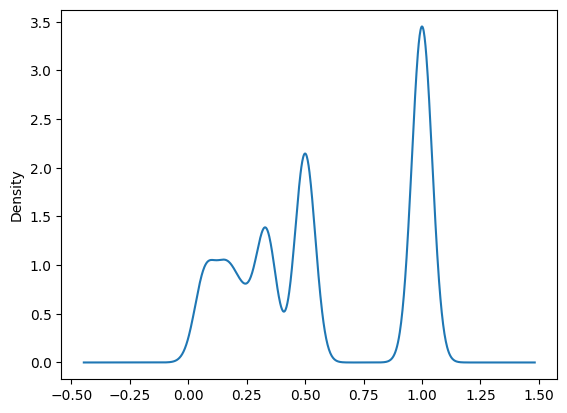

In [62]:
# Data on distribution of 'likelihood' or 'confidence' (1/num possible dwellings) of an event placement
df.dwelling_likelihood.plot.density()

### Who are the top offenders?


### Types of offenses

* Colens problem: no time data for dwellings -> allow all (which survive the distance, etc filters)
* Raphael problem: time data for some dwellings, some events in the gaps between
    * 5 -> 2 are excluded from being out of Paris -> 1 we know for being too far into future
* American Express problem: if only address, keep it; if 1 of n, remove it

In [53]:
# get top 25 offenders
num_ambig_events = df[df.dwelling_matchtype.str.contains('Ambiguous')].groupby('member').event.nunique().sort_values(ascending=False)
num_ambig_events.head(25)

member
colens-fernand              529
vigan-monique-de            324
fournier-jeanne             243
teissier-jeanine-delpech    229
macleish-ada                227
macleish-archibald          227
claudius-agnes              225
rirachowsky-fanny           190
massey                      175
sheldon-james-s             172
le-gallienne-richard        170
stein-leo                   141
yarrow-catherine            139
edwards-thomas              138
tony-mayer                  137
violette                    130
antoine-may                 130
wilde-dorothy               128
rivoallan-anatole           127
wissotzky-irene             124
price-phyllis               117
boscq-marie                 115
michaelides-l               115
lacroix-elise                99
wendel                       95
Name: event, dtype: int64

#### Case study: France Raphael

In [54]:
# Which dwellings do we have for France Raphael?
Dwellings().data.query('member=="raphael-france"').sort_values('dwelling_start')

,member,dwelling,arrond,dwelling_start,dwelling_end,dwelling_address,dwelling_city,lat,lon
2850,raphael-france,raphael-france;43.41666;6.83739;;,,,,,Saint-Raphaël,43.41666,6.83739
2852,raphael-france,raphael-france;48.80546;2.44419;;,,,,1 rue Traverse Brest,Brest,48.80546,2.44419
2849,raphael-france,raphael-france;48.84855;2.30906;1921-01-01;192...,7,1921-01-01,1929-03-01,40 avenue de Saxe,Paris,48.84855,2.30906
2853,raphael-france,raphael-france;48.83944;2.33348;1929-04-01;193...,14,1929-04-01,1937-07-01,18 rue Boissonade,Paris,48.83944,2.33348
2851,raphael-france,raphael-france;48.83871;2.33253;1937-08-01;195...,14,1937-08-01,1959-01-01,40 rue Boissonade,Paris,48.83871,2.33253
